### This notebook is to analyze the Customer's Credit Card data and apply Unsupervised Machine Learning techniques to understand the hidden relationship within the dataset so that appropriate customer base can be identified for marketing or promition purpose to increase sales/revenue etc.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd;
dfCCOrig=pd.read_csv("/content/drive/MyDrive/YU-ML-Proj-1/Week6/Credit_Card.csv")
dfCCOrig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## From above, it was observed that all available variables are of numeric data type except one (CUST_ID)

## Perform Null checks (% of Null values)

In [ ]:
dfCCOrigLen=len(dfCCOrig)
df1=(dfCCOrig.isnull().sum()/dfCCOrigLen)*100
df2=df1[df1.values>0]
df2.sort_values(ascending=False)

MINIMUM_PAYMENTS    3.497207
CREDIT_LIMIT        0.011173
dtype: float64

# Perform EDA on Numeric variables

In [ ]:
dfCCNumeric= dfCCOrig.drop(['CUST_ID', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT'], axis=1)

In [ ]:
dfCCNumeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BALANCE                 8950 non-null   float64
 1   PURCHASES               8950 non-null   float64
 2   ONEOFF_PURCHASES        8950 non-null   float64
 3   INSTALLMENTS_PURCHASES  8950 non-null   float64
 4   CASH_ADVANCE            8950 non-null   float64
 5   PURCHASES_FREQUENCY     8950 non-null   float64
 6   CASH_ADVANCE_TRX        8950 non-null   int64  
 7   PURCHASES_TRX           8950 non-null   int64  
 8   CREDIT_LIMIT            8949 non-null   float64
 9   PAYMENTS                8950 non-null   float64
 10  MINIMUM_PAYMENTS        8637 non-null   float64
 11  TENURE                  8950 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 839.2 KB


array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>,
        <Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>],
       [<Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>,
        <Axes: title={'center': 'CREDIT_LIMIT'}>],
       [<Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

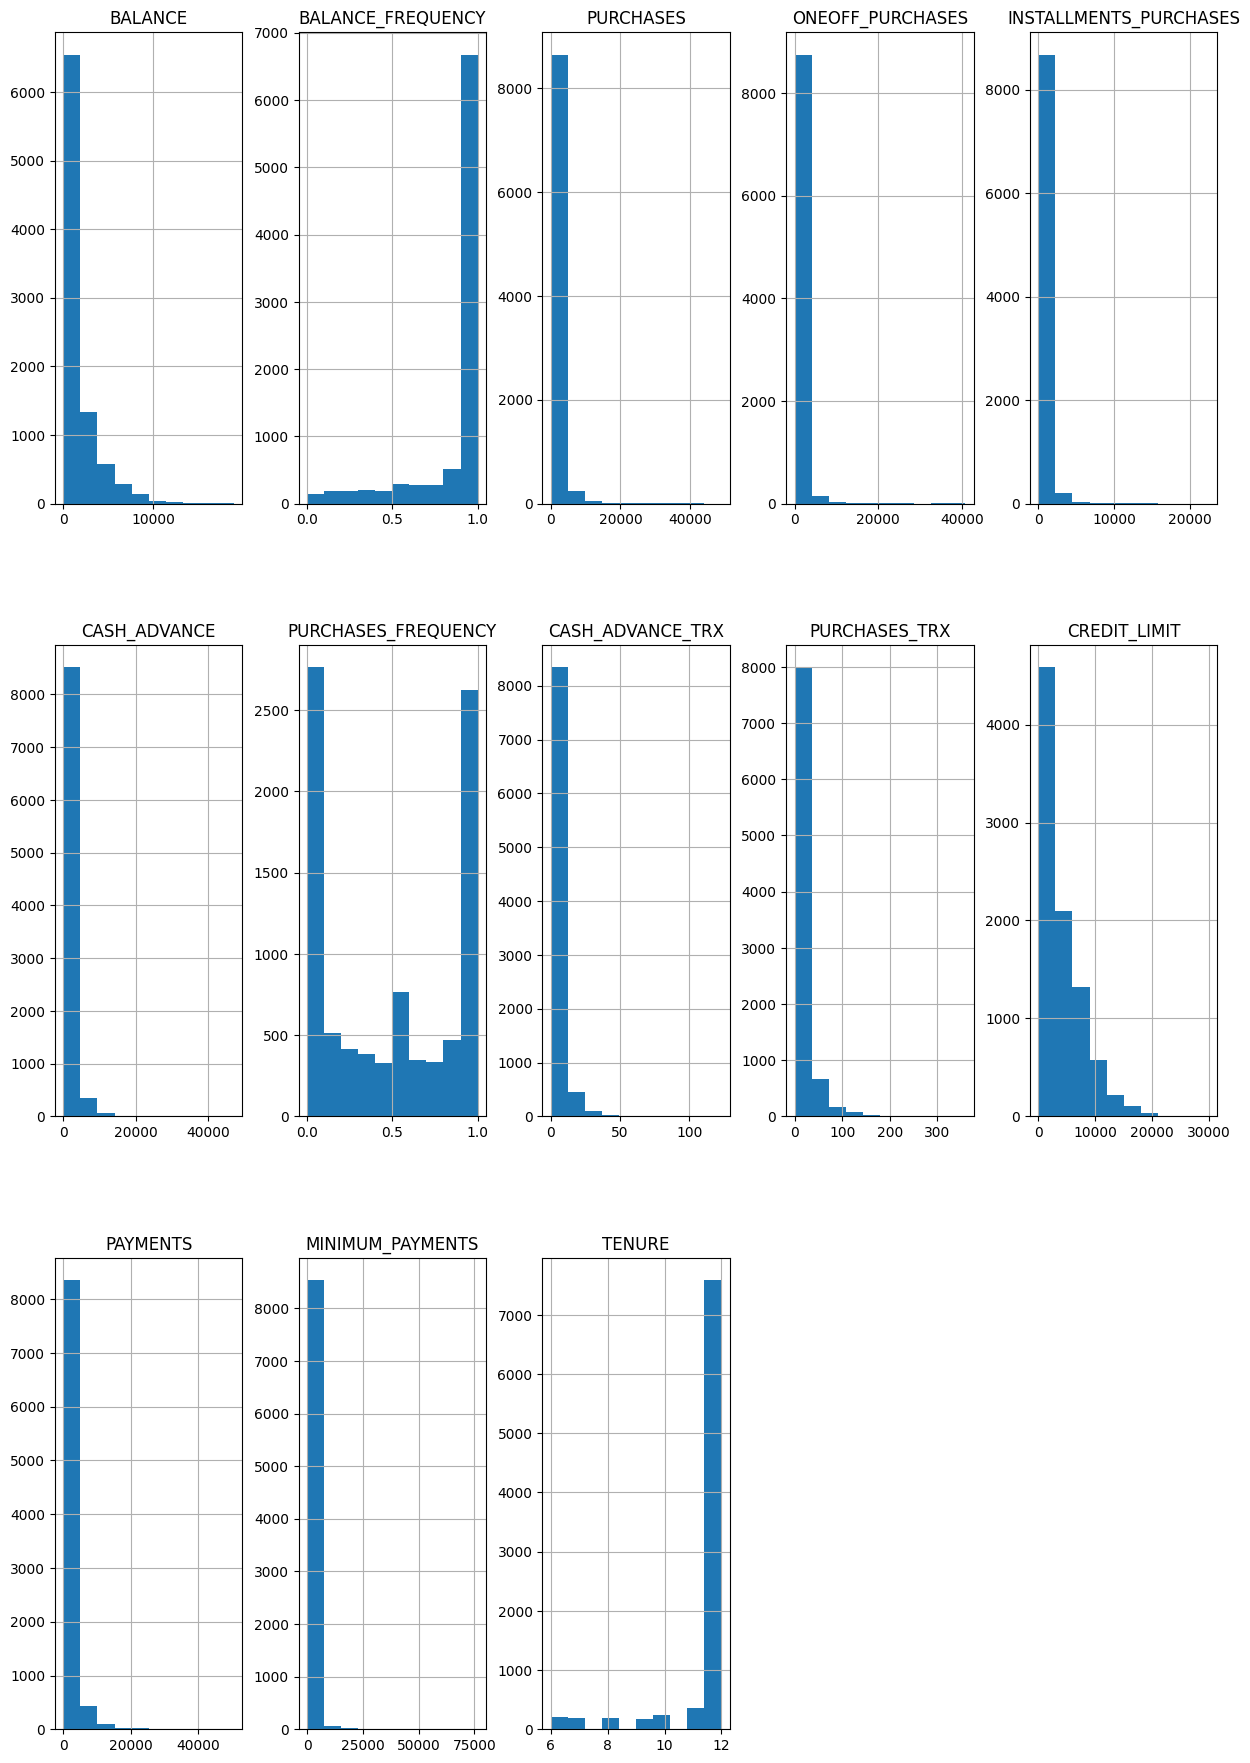

In [ ]:
dfCCOrig.drop(['CUST_ID', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT'], axis=1).hist(figsize=(15,30),layout=(4,5))

# Histogram to understand the corelation

<Axes: >

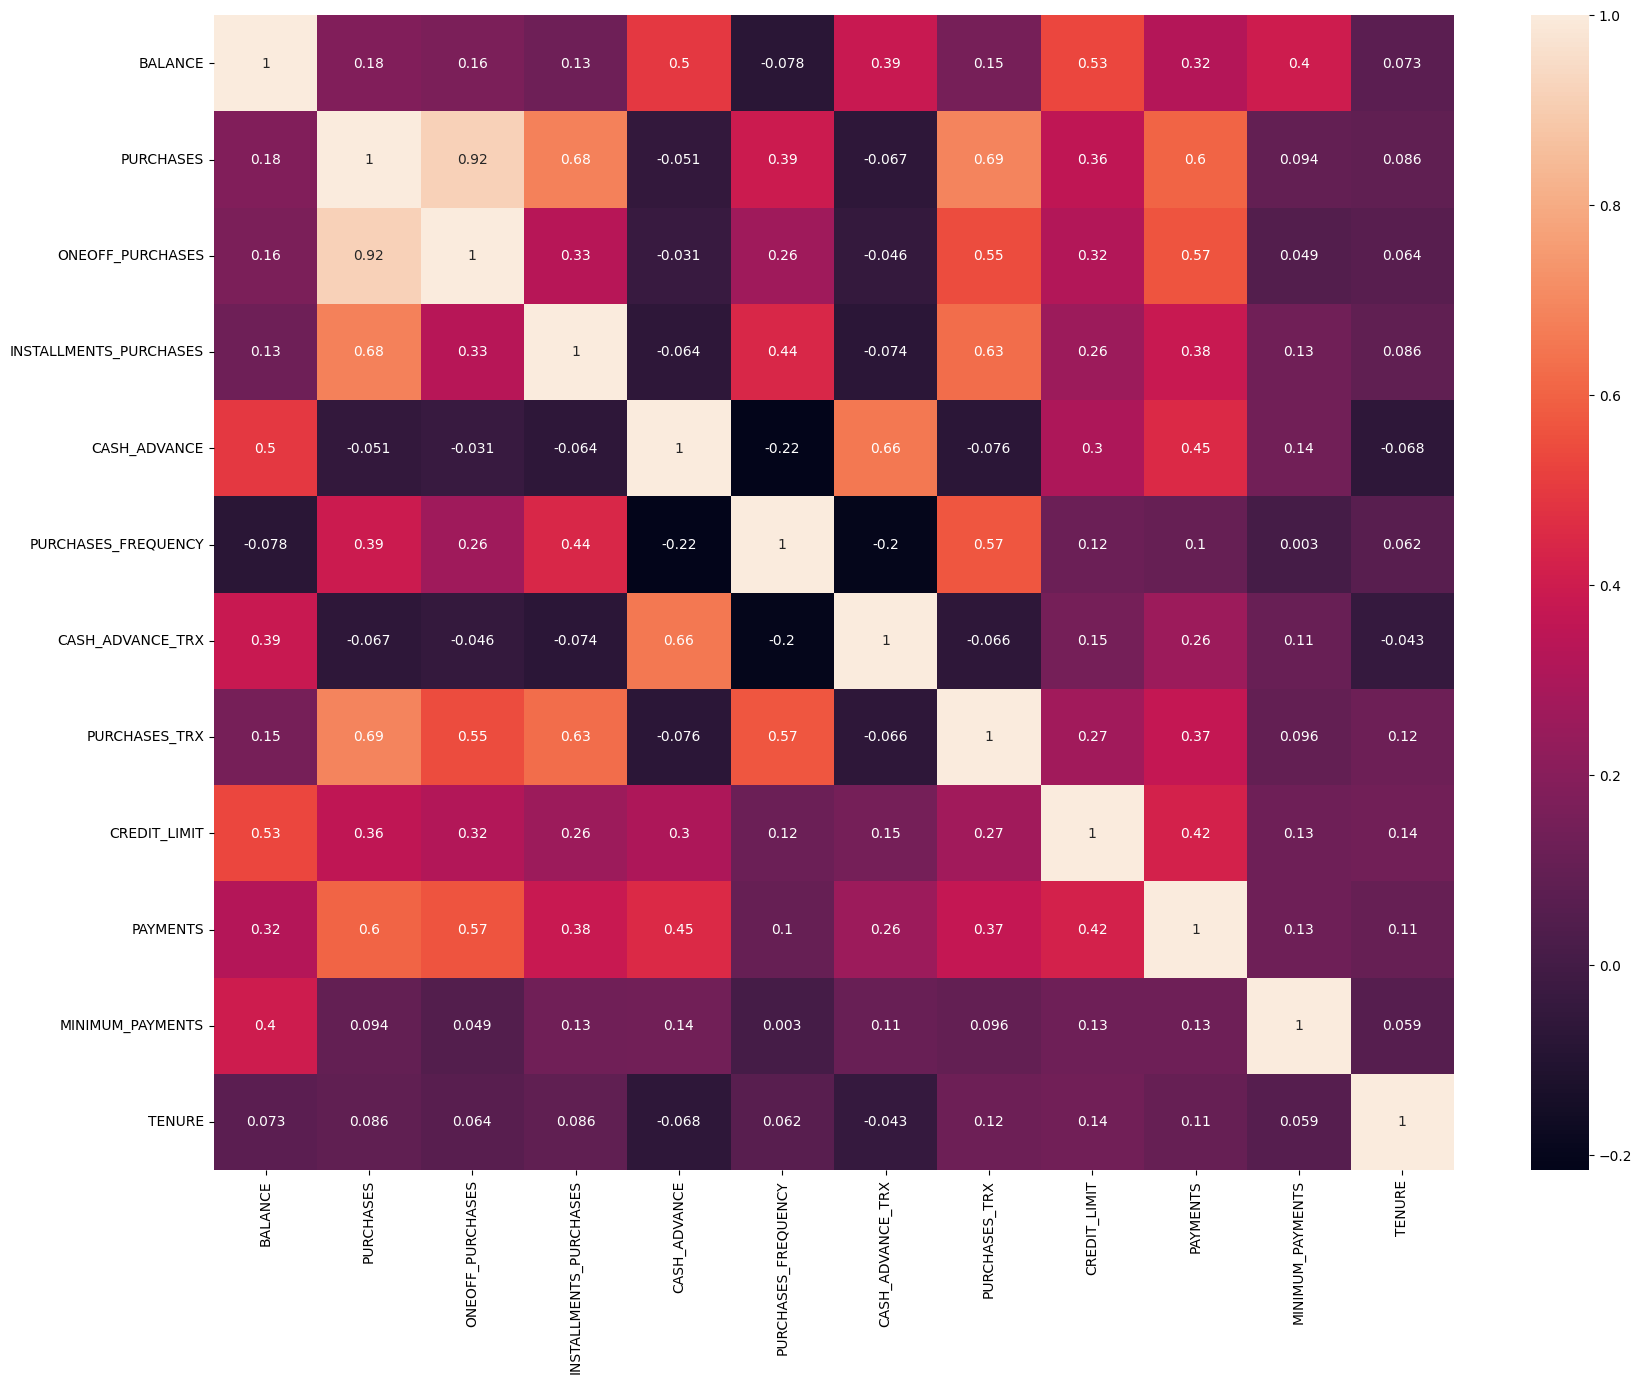

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.subplots(figsize=(20,15))
corr=dfCCNumeric.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns, annot=True, )

# Perform Imputation to fill the missing or null values for above 2 variables

MINIMUM_PAYMENTS    
CREDIT_LIMIT        

In [ ]:
dfCCPP=dfCCOrig
dfmeanMP=dfCCPP["MINIMUM_PAYMENTS"].mean().round(0).astype(int)
dfCCPP["MINIMUM_PAYMENTS"].fillna(dfmeanMP, inplace=True)

dfmeanCL=dfCCPP["CREDIT_LIMIT"].mean().round(0).astype(int)
dfCCPP["CREDIT_LIMIT"].fillna(dfmeanCL, inplace=True)

# Null Check after Imputation (We can see there is no null data in teh dataset after imputation is done)

In [ ]:
dfCCOrigLen=len(dfCCPP)
df1=(dfCCPP.isnull().sum()/dfCCOrigLen)*100
df2=df1[df1.values>0]
df2.sort_values(ascending=False)

Series([], dtype: float64)

In [ ]:
from sklearn import preprocessing

dfCCPPSub=dfCCPP.drop(['CUST_ID'], axis=1)

dfCCPP_norm = preprocessing.normalize(dfCCPPSub)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto')
kmeans.fit(dfCCPP_norm)

KMeans(n_clusters=4, n_init='auto', random_state=0)

In [ ]:
kmeans.labels_

array([1, 2, 1, ..., 1, 1, 0], dtype=int32)

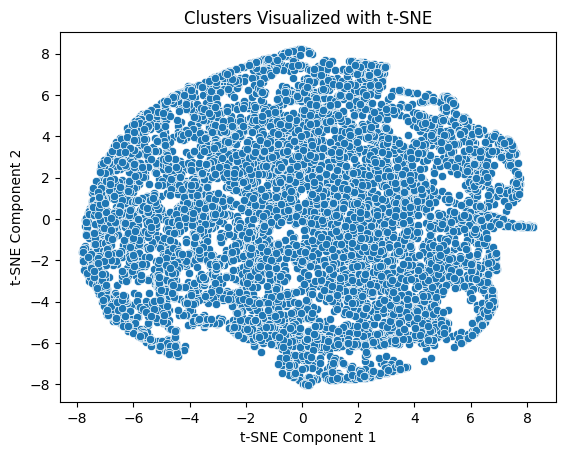

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,  perplexity=30, learning_rate=0.1, n_iter=2000)
X_tsne = tsne.fit_transform(dfCCPP_norm)

# Add the cluster information to the reduced data
df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne)
plt.title('Clusters Visualized with t-SNE')
plt.show()

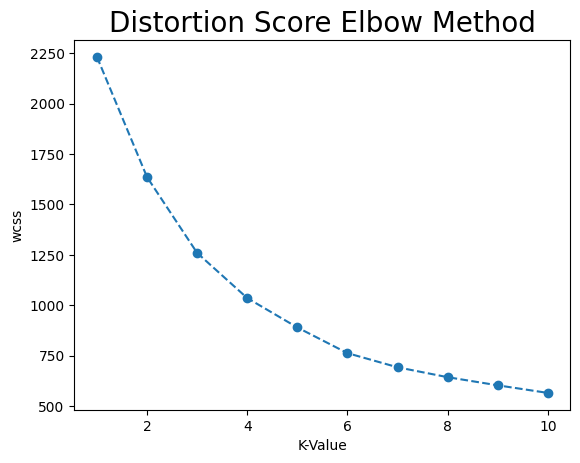

In [ ]:
wcss= []

for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    km.fit(dfCCPP_norm)
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss, marker='o', linestyle='--')
plt.title('Distortion Score Elbow Method', fontsize =20)
plt.xlabel('K-Value')
plt.ylabel('wcss')
plt.show()

In [ ]:
n_clusters = 3
# Instantiate the KMeans model
kmeans = KMeans(n_clusters=n_clusters )

# Fit the model to the scaled data
kmeans.fit(dfCCPP_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [29]:
kmeans.labels_

array([2, 1, 2, ..., 2, 2, 0], dtype=int32)

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(dfCCPP_norm, kmeans.labels_, metric='euclidean')

In [31]:
score

0.32222630149805565

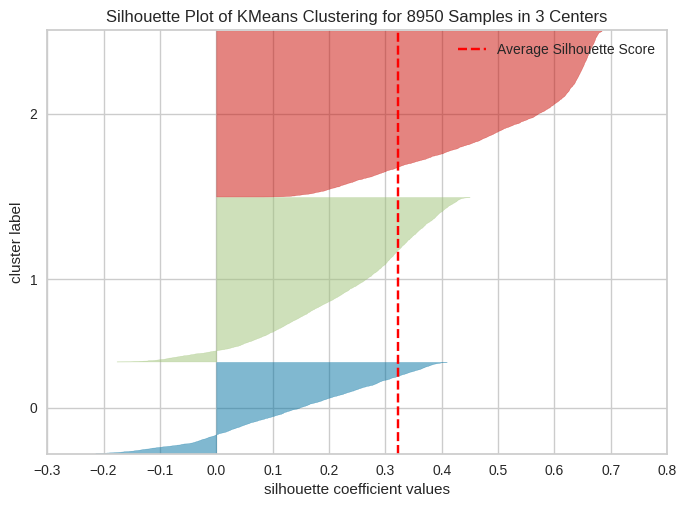

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8950 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [36]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(dfCCPP_norm)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

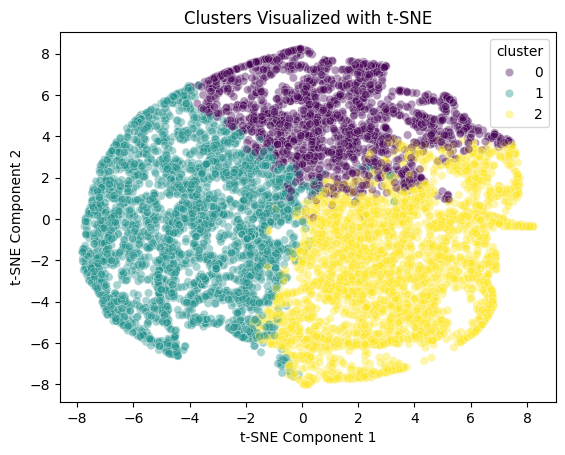

In [ ]:
df_tsne['cluster'] = kmeans.labels_

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne, palette='viridis', alpha=0.4 )
plt.title('Clusters Visualized with t-SNE')
plt.show()

In [ ]:
pca_labels = kmeans.fit_predict(dfCCPP_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
dfCCOrig['cluster']=pca_labels

In [ ]:
dfCCOrig.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.000000,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


<ipython-input-20-9d33e8e2f301>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfCCOrig.corr()


<Axes: >

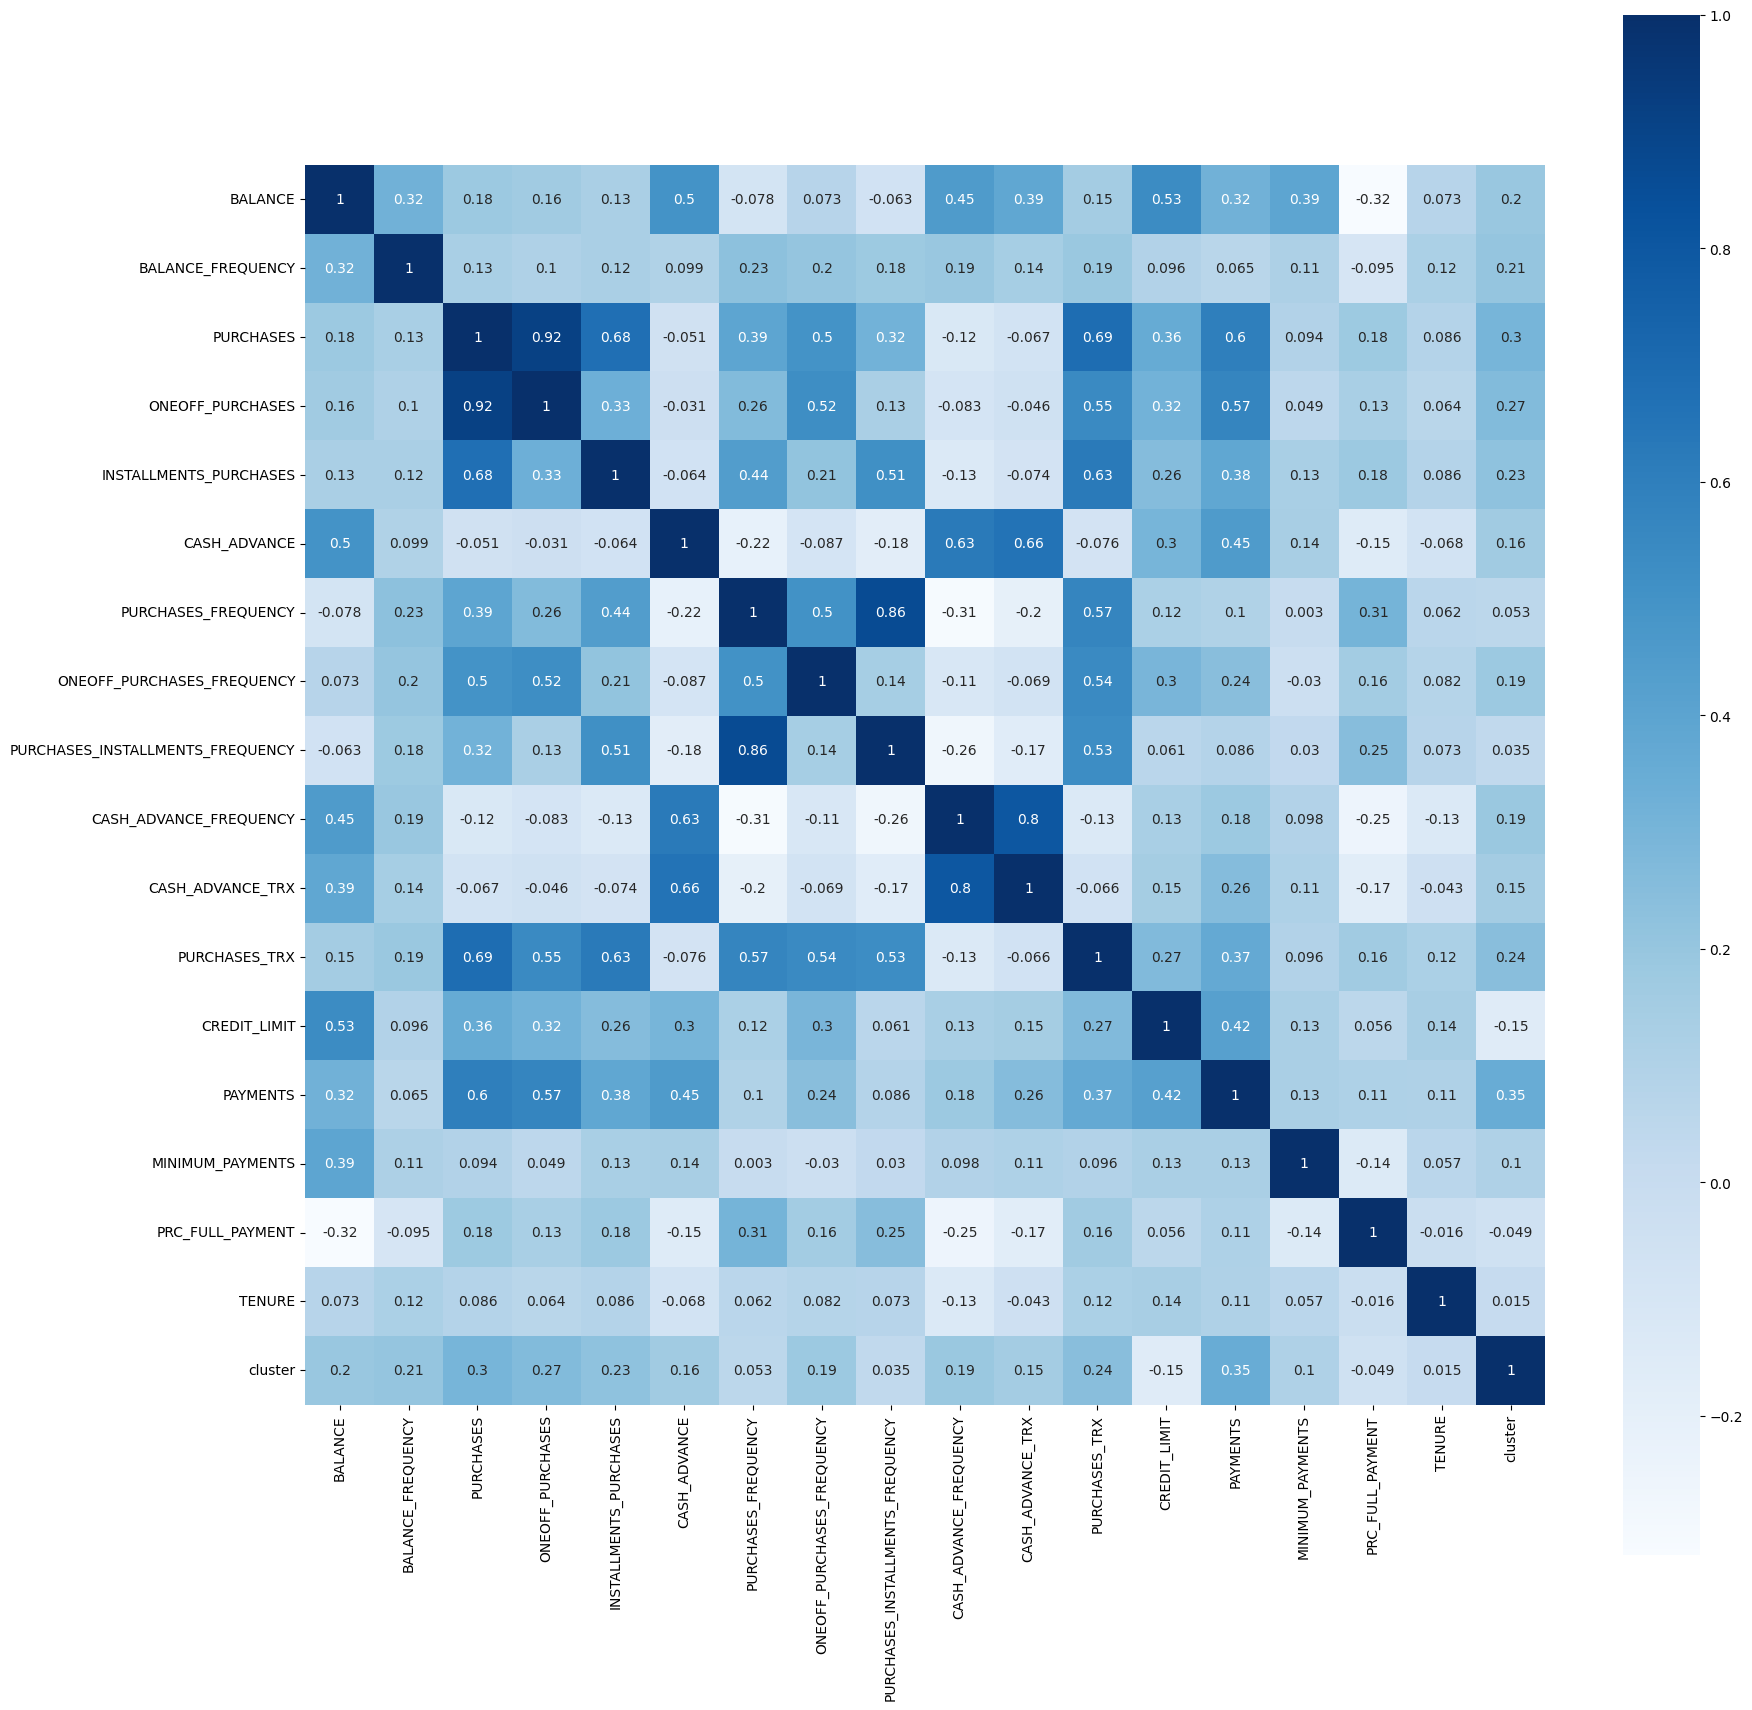

In [ ]:
corr = dfCCOrig.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr, square = True, annot = True, cmap = 'Blues')

In [ ]:
cols_imp = list(corr[(corr['cluster'] <=-0.15) | (corr['cluster'] >=0.15)].index)
cols_imp

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'ONEOFF_PURCHASES_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'cluster']

In [ ]:
cols_imp=['BALANCE',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'CREDIT_LIMIT',
 'PAYMENTS',
'MINIMUM_PAYMENTS',
'TENURE'
 'cluster']



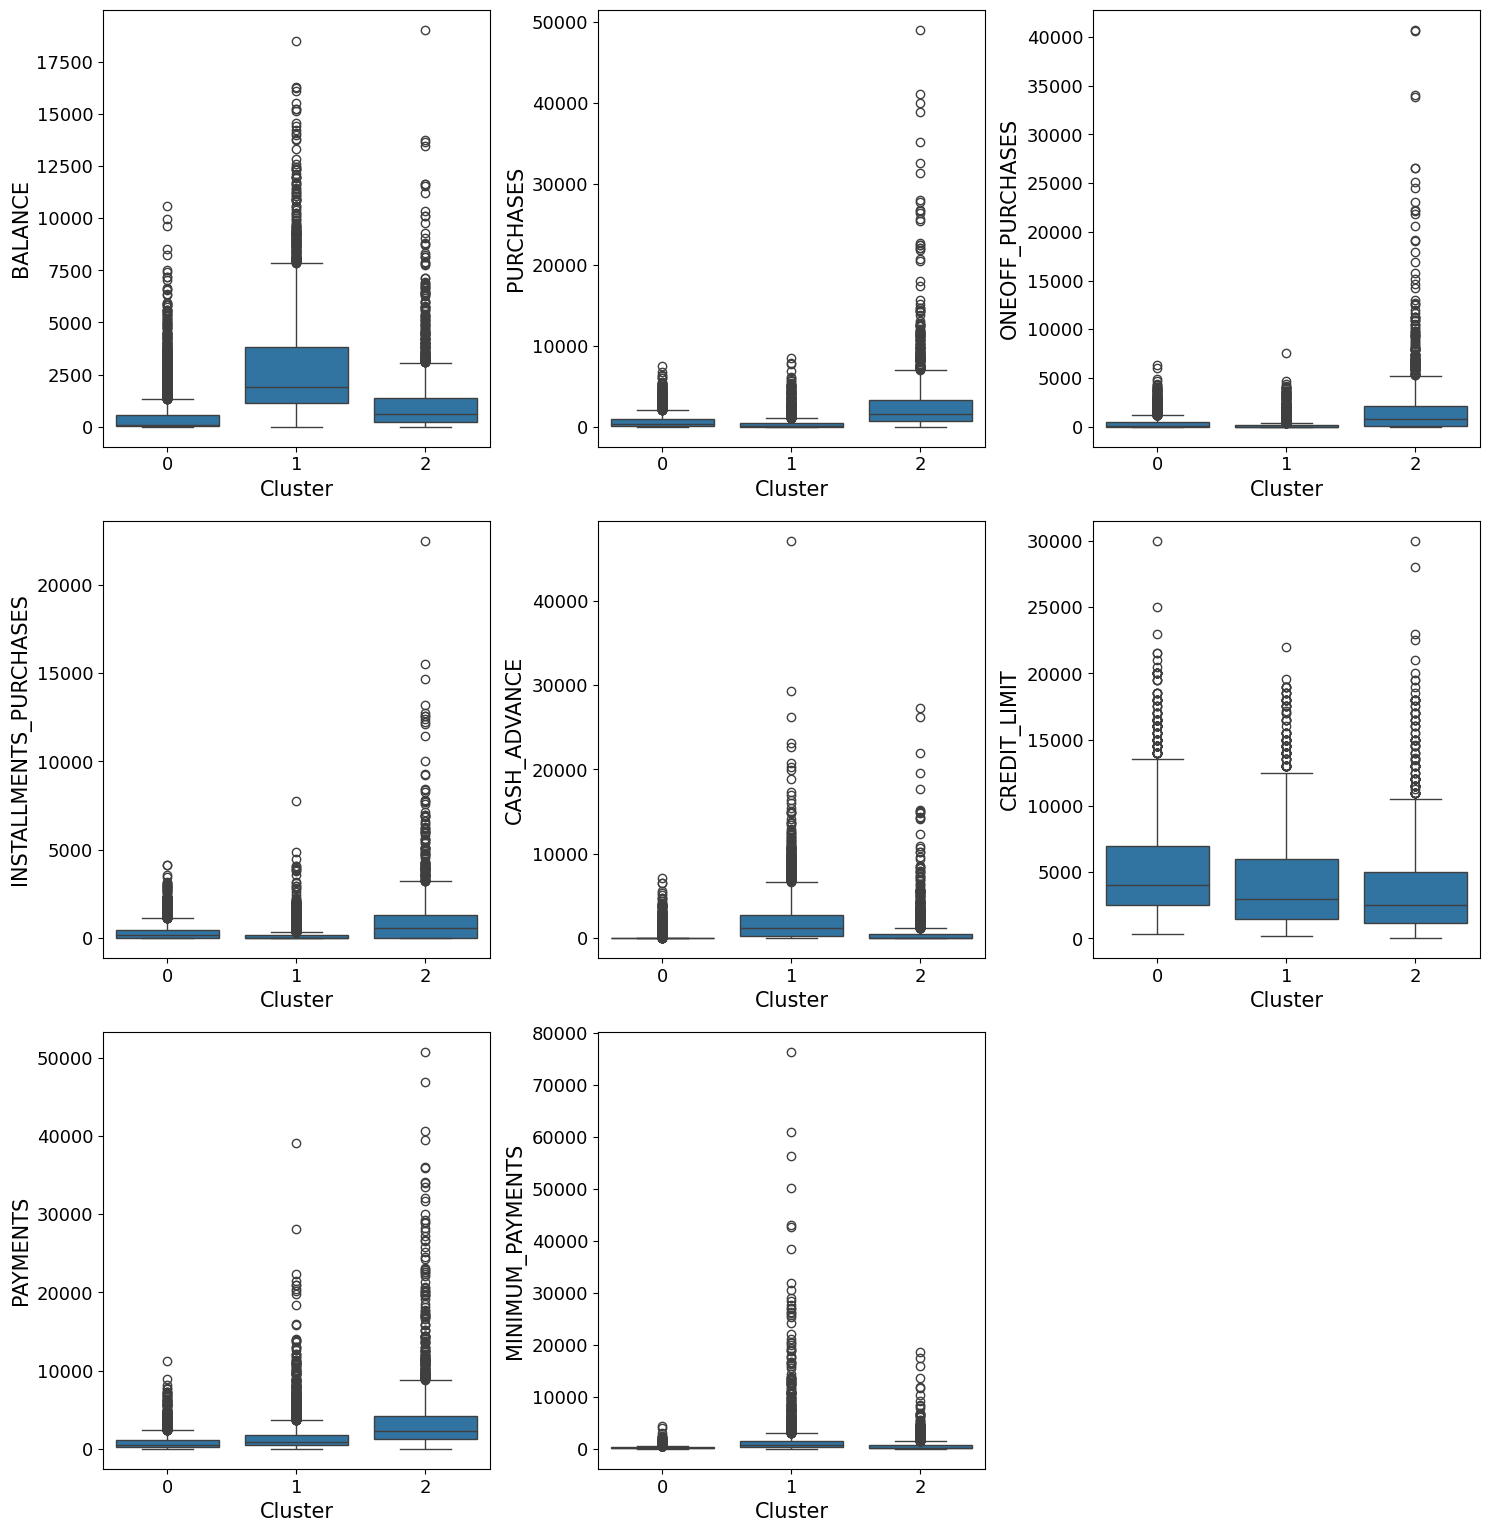

In [ ]:
plt.figure(figsize = (15, 20))
for i, col in enumerate(cols_imp[:-1]):
  if i+1 < 16:
    ax = plt.subplot(4, 3, i+1)
    sns.boxplot(x = dfCCOrig['cluster'], y = dfCCOrig[col])
    plt.xlabel("Cluster", fontsize = 15)
    plt.ylabel(col, fontsize = 15)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)


plt.tight_layout()
plt.show()

In [ ]:
dfCluster0=dfCCOrig[dfCCOrig['cluster']==0]
dfCluster1=dfCCOrig[dfCCOrig['cluster']==1]
dfCluster2=dfCCOrig[dfCCOrig['cluster']==2]

In [ ]:
dfCluster0.shape

(3530, 19)

In [ ]:
dfCluster1.shape

(3495, 19)

In [ ]:
dfCluster2.shape

(1925, 19)

In [ ]:
dfCluster0S=dfCluster0[['BALANCE','PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PAYMENTS', 'MINIMUM_PAYMENTS','CREDIT_LIMIT','CASH_ADVANCE', 'TENURE']]
df0=dfCluster0S.describe().loc[['mean' ]].round(2)
df0['MINIMUM_PAYMENT_TO_CC_LIMIT(%)']=((df0['MINIMUM_PAYMENTS']/df0['CREDIT_LIMIT'])*100).round(2)
df0['BALANCE_TO_CC_LIMIT(%)']=((df0['BALANCE']/df0['CREDIT_LIMIT'])*100).round(2)
df0['CASH_ADVANCE_TO_CC_LIMIT(%)']=((df0['CASH_ADVANCE']/df0['CREDIT_LIMIT'])*100).round(2)
df0['TOTAL_SPENDING']=(df0['PURCHASES']+df0['CASH_ADVANCE']).round(2)
df0['SPEND_To_CC_LIMIT(%)']=((df0['TOTAL_SPENDING']/df0['CREDIT_LIMIT'])*100).round(2)
df0.insert(0,'Cluster_Name', 'Cluster 0')


In [ ]:
dfCluster1S=dfCluster1[['BALANCE','PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PAYMENTS', 'MINIMUM_PAYMENTS','CREDIT_LIMIT', 'CASH_ADVANCE','TENURE']]
df1=dfCluster1S.describe().loc[['mean']].round(2)
df1['MINIMUM_PAYMENT_TO_CC_LIMIT(%)']=((df1['MINIMUM_PAYMENTS']/df1['CREDIT_LIMIT'])*100).round(2)
df1['BALANCE_TO_CC_LIMIT(%)']=((df1['BALANCE']/df1['CREDIT_LIMIT'])*100).round(2)
df1['TOTAL_SPENDING']=(df1['PURCHASES']+df1['CASH_ADVANCE']).round(2)
df1['CASH_ADVANCE_TO_CC_LIMIT(%)']=((df1['CASH_ADVANCE']/df1['CREDIT_LIMIT'])*100).round(2)
df1['SPEND_To_CC_LIMIT(%)']=((df1['TOTAL_SPENDING']/df1['CREDIT_LIMIT'])*100).round(2)
df1.insert(0,'Cluster_Name', 'Cluster 1')


In [ ]:
dfCluster2S=dfCluster2[['BALANCE','PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PAYMENTS', 'MINIMUM_PAYMENTS','CREDIT_LIMIT', 'CASH_ADVANCE','TENURE']]
df2=dfCluster2S.describe().loc[['mean']].round(2)
df2['MINIMUM_PAYMENT_TO_CC_LIMIT(%)']=((df2['MINIMUM_PAYMENTS']/df2['CREDIT_LIMIT'])*100).round(2)
df2['BALANCE_TO_CC_LIMIT(%)']=((df2['BALANCE']/df2['CREDIT_LIMIT'])*100).round(2)
df2['CASH_ADVANCE_TO_CC_LIMIT(%)']=((df2['CASH_ADVANCE']/df2['CREDIT_LIMIT'])*100).round(2)
df2['TOTAL_SPENDING']=(df2['PURCHASES']+df2['CASH_ADVANCE']).round(2)
df2['SPEND_To_CC_LIMIT(%)']=((df2['TOTAL_SPENDING']/df2['CREDIT_LIMIT'])*100).round(2)
df2.insert(0,'Cluster_Name', 'Cluster 2')


In [ ]:
cluster_frames = [df0, df1, df2]

result = pd.concat(cluster_frames)
result ['INSTALLMENTS_PURCHASES_TO_CC_LIMIT %']=((result['INSTALLMENTS_PURCHASES']/result['CREDIT_LIMIT'])*100).round(2)
result ['ONEOFF_PURCHASES_TO_CC_LIMIT %']=((result['ONEOFF_PURCHASES']/result['CREDIT_LIMIT'])*100).round(2)
result ['PAYMENTS_TO_TOTAL_SPENDING %']=((result['PAYMENTS']/result['TOTAL_SPENDING'])*100).round(2)
result


,Cluster_Name,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PAYMENTS,MINIMUM_PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE,TENURE,MINIMUM_PAYMENT_TO_CC_LIMIT(%),BALANCE_TO_CC_LIMIT(%),CASH_ADVANCE_TO_CC_LIMIT(%),TOTAL_SPENDING,SPEND_To_CC_LIMIT(%),INSTALLMENTS_PURCHASES_TO_CC_LIMIT %,ONEOFF_PURCHASES_TO_CC_LIMIT %,PAYMENTS_TO_TOTAL_SPENDING %
mean,Cluster 0,558.89,694.98,360.74,334.58,850.54,287.70,5210.56,161.85,11.54,5.52,10.73,3.11,856.83,16.44,6.42,6.92,99.27
mean,Cluster 1,2802.63,369.51,203.68,165.99,1523.86,1553.27,4140.49,1971.88,11.44,37.51,67.69,47.62,2341.39,56.55,4.01,4.92,65.08
mean,Cluster 2,1160.49,2718.94,1723.15,996.28,3731.60,670.28,3823.92,674.22,11.63,17.53,30.35,17.63,3393.16,88.74,26.05,45.06,109.97


# Cluster 0:- Marketing Stratgey:

1. These groups of Customers have the lowest balance to Credit Card limit. Their Credit Card limit can be increased so they can have more balance on the card to spend.
2. They have lowest Cash advance usage. Additional discounts can be given on Interest charged on Cash advance to promote them to use the card for immediate cash requirements.
3. This group of customers have a high minimum payment requirement (around 37% of their credit limit). Minimum payment requirement can be reduced to 10% (from 37%)  of their credit limit to encourage them to do more purchase or utilize the remaining credit limit

# Cluster 1:- Marketing Stratgey:

1. Provide Cashback promotion to encourage them to utilize the CC balance since they have more than 67% balance left in the card.
2. This group has high Cash Advance requirements (around 48% of CC Limit) i.e they are more dependent on Credit Card for their immediate Cash requirements.
This group of customers make the lowest installment purchase compared to customers from other 2 groups.
3. A rebate can be given to reduce the interest rate on installment purchase to encourage spending on this category or the grace period for interest free periods can be increased to increase more sales


# Cluster 2:- Marketing Stratgey:
1. Increase Credit limit since the average number of customers in this cluster is spending around 89% of their credit Limit.
2. This group of Customers use more than 45% of their credit limit for "One Off Purchases" i.e they have some tendency/requirement to use the credit card to make big purchases. It can be analyzed further to understand whether there is any seasonality associated with it and marketing strategy can be developed accordingly.
3. Also, the Credit Risk for these customers are low since they always  payback compared  to their overall spending.


(3530, 19)

In [ ]:
dfCluster1.shape

(3495, 19)

In [ ]:
dfCluster2.shape

(1925, 19)